In [1]:
!pip install py2neo pandas

In [2]:
from py2neo import Graph

In [3]:
graph = Graph("bolt://localhost:7687", auth=("neo4j", "987654321")) 

In [4]:
query = """
WITH "https://api.stackexchange.com/2.2/questions?pagesize=100&order=desc&sort=creation&tagged=neo4j&site=stackoverflow&filter=!5-i6Zw8Y)4W7vpy91PMYsKM-k9yzEsSC1_Uxlf" AS url
CALL apoc.load.json(url) YIELD value

UNWIND value.items AS q

MERGE (question:Question {id:q.question_id})
  ON CREATE SET question.title = q.title, question.share_link = q.share_link, question.favorite_count = q.favorite_count, question.creation_date = q.creation_date
"""
graph.run(query).to_data_frame()

""


In [5]:
query = """
WITH "https://api.stackexchange.com/2.2/questions?pagesize=100&order=desc&sort=creation&tagged=neo4j&site=stackoverflow&filter=!5-i6Zw8Y)4W7vpy91PMYsKM-k9yzEsSC1_Uxlf" AS url
CALL apoc.load.json(url) YIELD value

UNWIND value.items AS q
MATCH (question:Question {id: q.question_id})
MERGE (owner:User {id:q.owner.user_id})
  ON CREATE SET owner.display_name = q.owner.display_name
MERGE (owner)-[:ASKED]->(question)
"""
graph.run(query).to_data_frame()

""


In [6]:
query = """
WITH "https://api.stackexchange.com/2.2/questions?pagesize=100&order=desc&sort=creation&tagged=neo4j&site=stackoverflow&filter=!5-i6Zw8Y)4W7vpy91PMYsKM-k9yzEsSC1_Uxlf" AS url
CALL apoc.load.json(url) YIELD value

UNWIND value.items AS q
MATCH (question:Question {id: q.question_id})

FOREACH (tagName IN q.tags | MERGE (tag:Tag {name:tagName}) MERGE (question)-[:TAGGED]->(tag))
FOREACH (a IN q.answers |
   MERGE (question)<-[:ANSWERED]-(answer:Answer {id:a.answer_id})
   MERGE (answerer:User {id:a.owner.user_id}) ON CREATE SET answerer.display_name = a.owner.display_name
   MERGE (answer)<-[:PROVIDED]-(answerer)
)
"""
graph.run(query).to_data_frame()

""


In [9]:
query = """
UNWIND range(1,10) as page
WITH "https://api.stackexchange.com/2.2/questions?page="+page+"&pagesize=100&order=desc&sort=creation&tagged=neo4j&site=stackoverflow&filter=!5-i6Zw8Y)4W7vpy91PMYsKM-k9yzEsSC1_Uxlf" AS url
CALL apoc.load.json(url) YIELD value

UNWIND value.items AS q

MERGE (question:Question {id:q.question_id})
  ON CREATE SET question.title = q.title, question.share_link = q.share_link, question.favorite_count = q.favorite_count, question.creation_date = q.creation_date
"""
graph.run(query).to_data_frame()

""


In [10]:
query = """
UNWIND range(1,10) as page
WITH "https://api.stackexchange.com/2.2/questions?page="+page+"&pagesize=100&order=desc&sort=creation&tagged=neo4j&site=stackoverflow&filter=!5-i6Zw8Y)4W7vpy91PMYsKM-k9yzEsSC1_Uxlf" AS url
CALL apoc.load.json(url) YIELD value

UNWIND value.items AS q
MATCH (question:Question {id:q.question_id})

MERGE (owner:User {id:coalesce(q.owner.user_id,'deleted')})
  ON CREATE SET owner.display_name = q.owner.display_name
MERGE (owner)-[:ASKED]->(question)
"""
graph.run(query).to_data_frame()

""


In [11]:
query = """
UNWIND range(1,10) as page
WITH "https://api.stackexchange.com/2.2/questions?page="+page+"&pagesize=100&order=desc&sort=creation&tagged=neo4j&site=stackoverflow&filter=!5-i6Zw8Y)4W7vpy91PMYsKM-k9yzEsSC1_Uxlf" AS url
CALL apoc.load.json(url) YIELD value

UNWIND value.items AS q
MATCH (question:Question {id:q.question_id})

FOREACH (tagName IN q.tags | MERGE (tag:Tag {name:tagName}) MERGE (question)-[:TAGGED]->(tag))
FOREACH (a IN q.answers |
   MERGE (question)<-[:ANSWERED]-(answer:Answer {id:a.answer_id})
   MERGE (answerer:User {id:coalesce(a.owner.user_id,'deleted')}) ON CREATE SET answerer.display_name = a.owner.display_name
   MERGE (answer)<-[:PROVIDED]-(answerer)
)
"""
graph.run(query).to_data_frame()

""


In [14]:
!pip install py2neo pandas matplotlib

     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
      --------------------------------------- 0.1/7.6 MB 2.2 MB/s eta 0:00:04
     -- ------------------------------------- 0.4/7.6 MB 4.1 MB/s eta 0:00:02
     --- ------------------------------------ 0.7/7.6 MB 6.5 MB/s eta 0:00:02
     --------- ------------------------------ 1.8/7.6 MB 9.5 MB/s eta 0:00:01
     -------------- ------------------------- 2.8/7.6 MB 11.9 MB/s eta 0:00:01
     ------------------ --------------------- 3.6/7.6 MB 12.6 MB/s eta 0:00:01
     ---------------------- ----------------- 4.3/7.6 MB 13.1 MB/s eta 0:00:01
     -------------------------- ------------- 5.1/7.6 MB 13.6 MB/s eta 0:00:01
     ------------------------------ --------- 5.9/7.6 MB 13.9 MB/s eta 0:00:01
     ---------------------------------- ----- 6.6/7.6 MB 14.1 MB/s eta 0:00:01
     -------------------------------------- - 7.4/7.6 MB 14.4 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 14.4 MB

In [15]:
from py2neo import Graph
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [16]:
graph = Graph("bolt://localhost:7687", auth=("neo4j", "987654321")) 

In [17]:
graph.run("CALL db.schema.visualization()").data()

[{'nodes': [Node('Answer', constraints=[], indexes=[], name='Answer'),
   Node('User', constraints=["Constraint( id=6, name='constraint_47e7f15d', type='UNIQUENESS', schema=(:User {id}), ownedIndex=5 )"], indexes=[], name='User'),
   Node('Question', constraints=["Constraint( id=2, name='constraint_f06c84a5', type='UNIQUENESS', schema=(:Question {id}), ownedIndex=1 )"], indexes=[], name='Question'),
   Node('Tag', constraints=["Constraint( id=4, name='constraint_64b1b1cf', type='UNIQUENESS', schema=(:Tag {name}), ownedIndex=3 )"], indexes=[], name='Tag')],
  'relationships': [TAGGED(Node(), Node()),
   ASKED(Node(), Node()),
   ANSWERED(Node(), Node()),
   PROVIDED(Node(), Node())]}]

In [18]:
result = {"label": [], "count": []}
for label in graph.run("CALL db.labels()").to_series():
    query = f"MATCH (:`{label}`) RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["label"].append(label)
    result["count"].append(count)
nodes_df = pd.DataFrame(data=result)
nodes_df.sort_values("count")

,label,count
2,Tag,394
1,User,799
3,Answer,887
0,Question,1000


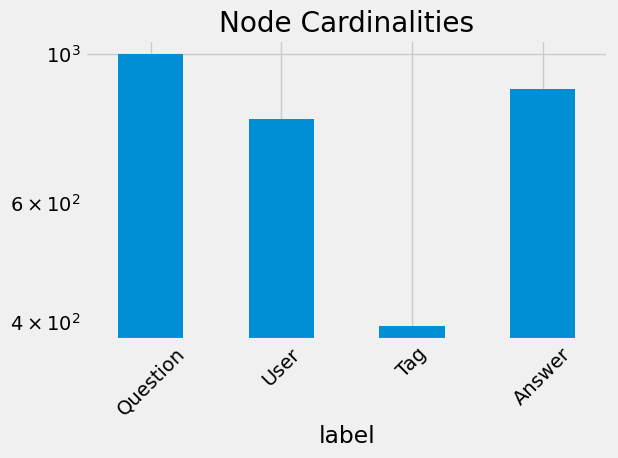

In [19]:
nodes_df.plot(kind='bar', x='label', y='count', legend=None, title="Node Cardinalities")
plt.yscale("log")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
result = {"relType": [], "count": []}
for relationship_type in graph.run("CALL db.relationshipTypes()").to_series():
    query = f"MATCH ()-[:`{relationship_type}`]->() RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["relType"].append(relationship_type)
    result["count"].append(count)
rels_df = pd.DataFrame(data=result)
rels_df.sort_values("count")

,relType,count
2,ANSWERED,887
3,PROVIDED,887
0,ASKED,1000
1,TAGGED,2845


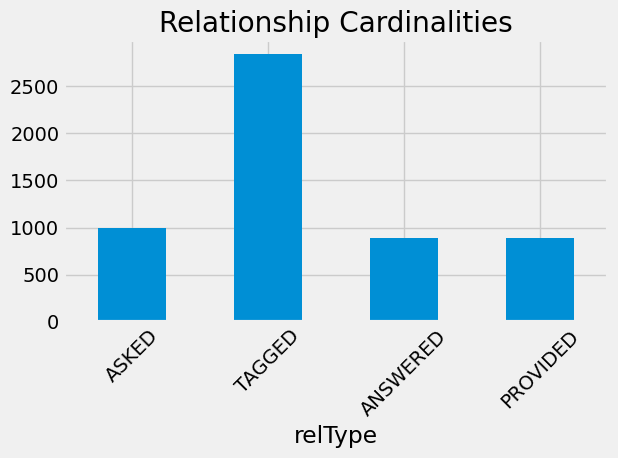

In [21]:
rels_df.plot(kind='bar', x='relType', y='count', legend=None, title="Relationship Cardinalities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
exploratory_query = """
MATCH (t1:Tag)<-[:TAGGED]-()-[:TAGGED]->(t2:Tag)
WHERE id(t1) < id(t2) and t1.name <> 'neo4j' and t2.name <> 'neo4j'
RETURN t1.name, t2.name,count(*) as freq
ORDER BY freq desc LIMIT 10;
"""

graph.run(exploratory_query).to_data_frame()

,t1.name,t2.name,freq
0,cypher,graph-databases,47
1,cypher,neo4j-apoc,45
2,cypher,memgraphdb,23
3,cypher,opencypher,18
4,cypher,python,17
5,cypher,graph,17
6,memgraphdb,opencypher,16
7,cypher,database,16
8,java,spring-data-neo4j,16
9,spring-data-neo4j,spring,14


In [29]:
query = """
MATCH (q:Question)
RETURN size((q)<-[:TAGGED]-()) AS tags
"""

citation_df = graph.run(query).to_data_frame()
citation_df.describe([.25, .5, .75, .9, .99])

,tags
count,1000.000
mean,0.000
std,0.000
min,0.000
25%,0.000
50%,0.000
75%,0.000
90%,0.000
99%,0.000
max,0.000
